<a href="https://colab.research.google.com/github/a20fe/learning-notebooks/blob/main/Copy_of_shai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer , SimpleImputer
from sklearn.preprocessing import StandardScaler, normalize


In [ ]:
df = pd.read_csv('/content/Salaries.csv')
df.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN  
1  2011    NaN  San Francisco     NaN  
2  2011    NaN  San Francisco     NaN  
3  2011    NaN  San Francisco     NaN  
4  2011    NaN  San Francisco     NaN

In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.shape

(148654, 13)

In [ ]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df

Id       EmployeeName  \
0          1     NATHANIEL FORD   
1          2       GARY JIMENEZ   
2          3     ALBERT PARDINI   
3          4  CHRISTOPHER CHONG   
4          5    PATRICK GARDNER   
...      ...                ...   
40404  40405        David Parry   
40405  40406       Francisco Ho   
40406  40407    Manuel Gonzales   
40407  40408     Lauro Baca III   
40408  40409    Milagros Brosas   

                                             JobTitle    BasePay  OvertimePay  \
0      GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18         0.00   
1                     CAPTAIN III (POLICE DEPARTMENT)  155966.02    245131.88   
2                     CAPTAIN III (POLICE DEPARTMENT)  212739.13    106088.18   
3                WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00     56120.71   
4        DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60      9737.00   
...                                               ...        ...          ...   
40404                                Police Officer 3  117171.44     15729.27   
40405                                Police Officer 3  115243.79      3373.68   
40406                        Transit Power Line Sprv1  101660.00     23405.98   
40407                                Police Officer 2  114887.75     13882.03   
40408                                Registered Nurse        NaN          NaN   

        OtherPay  Benefits   TotalPay  TotalPayBenefits    Year  Notes  \
0      400184.25       NaN  567595.43         567595.43  2011.0    NaN   
1      137811.38       NaN  538909.28         538909.28  2011.0    NaN   
2       16452.60       NaN  335279.91         335279.91  2011.0    NaN   
3      198306.90       NaN  332343.61         332343.61  2011.0    NaN   
4      182234.59       NaN  326373.19         326373.19  2011.0    NaN   
...          ...       ...        ...               ...     ...    ...   
40404    9444.58  34797.29  142345.29         177142.58  2012.0    NaN   
40405   23949.76  34574.54  142567.23         177141.77  2012.0    NaN   
40406    8310.00  43764.64  133375.98         177140.62  2012.0    NaN   
40407   13831.60  34535.78  142601.38         177137.16  2012.0    NaN   
40408        NaN       NaN        NaN               NaN     NaN    NaN   

              Agency  
0      San Francisco  
1      San Francisco  
2      San Francisco  
3      San Francisco  
4      San Francisco  
...              ...  
40404  San Francisco  
40405  San Francisco  
40406  San Francisco  
40407  San Francisco  
40408            NaN  

[40409 rows x 12 columns]

In [ ]:
df=df.drop(["Status" ,"Notes"] , axis=1)


In [ ]:
filt = (df['OvertimePay'].isna()) & (df['OtherPay'].isna())
df[filt]

Id  EmployeeName      JobTitle  BasePay  OvertimePay  OtherPay  \
148646  148647  Not provided  Not provided      NaN          NaN       NaN   
148650  148651  Not provided  Not provided      NaN          NaN       NaN   
148651  148652  Not provided  Not provided      NaN          NaN       NaN   
148652  148653  Not provided  Not provided      NaN          NaN       NaN   

        Benefits  TotalPay  TotalPayBenefits  Year         Agency  
148646       NaN       0.0               0.0  2014  San Francisco  
148650       NaN       0.0               0.0  2014  San Francisco  
148651       NaN       0.0               0.0  2014  San Francisco  
148652       NaN       0.0               0.0  2014  San Francisco

In [ ]:
df.drop(df[filt].index, inplace=True)


In [ ]:
df.Agency.value_counts()

San Francisco    148650
Name: Agency, dtype: int64

In [ ]:
df.describe()

Id        BasePay    OvertimePay       OtherPay  \
count  148650.000000  148045.000000  148650.000000  148650.000000   
mean    74325.500047   66325.448840    5066.059886    3648.767297   
std     42911.703176   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37163.250000   33588.200000       0.000000       0.000000   
50%     74325.500000   65007.450000       0.000000     811.270000   
75%    111487.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  
count  112491.000000  148650.000000     148650.000000  148650.000000  
mean    25007.893151   74770.333901      93695.075969    2012.522603  
std     15402.215858   50516.196009      62792.497391       1.117526  
min       -33.890000    -618.130000       -618.130000    2011.000000  
25%     11535.395000   36169.955000      44073.337500    2012.000000  
50%     28628.620000   71427.240000      92406.020000    2013.000000  
75%     35566.855000  105842.960000     132877.992500    2014.000000  
max     96570.660000  567595.430000     567595.430000    2014.000000

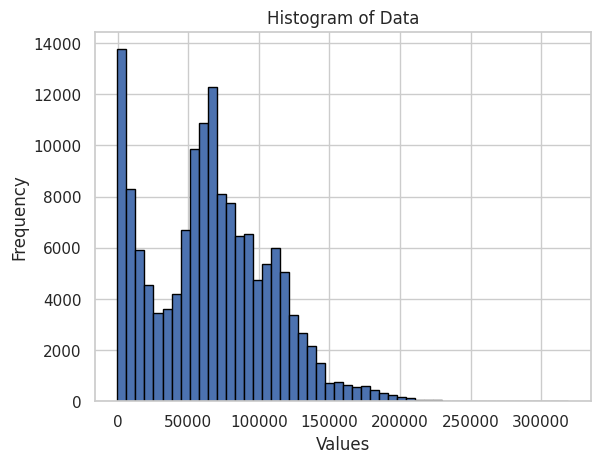

In [ ]:
plt.hist(df.BasePay, bins=50, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

<ipython-input-56-a6f0484e173e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'Id'),
 Text(1, 0, 'BasePay'),
 Text(2, 0, 'OvertimePay'),
 Text(3, 0, 'OtherPay'),
 Text(4, 0, 'Benefits'),
 Text(5, 0, 'TotalPay'),
 Text(6, 0, 'TotalPayBenefits'),
 Text(7, 0, 'Year')]

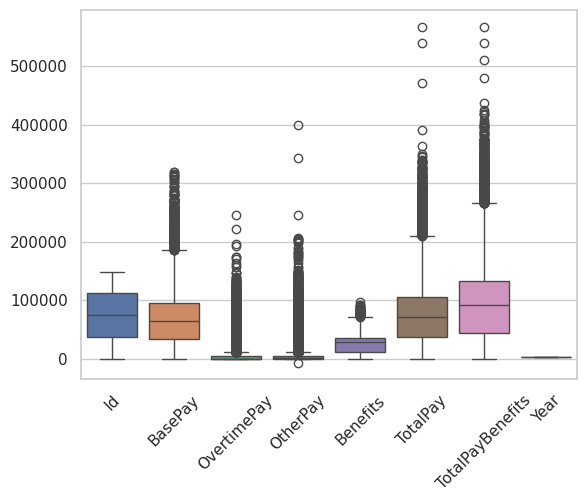

In [ ]:
ax = sns.boxplot( data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

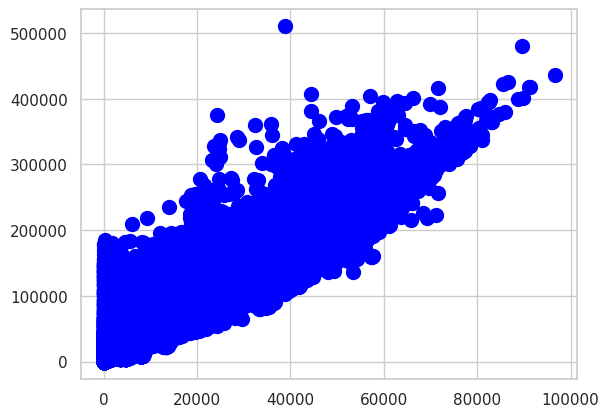

In [ ]:
plt.scatter(df.Benefits, df.TotalPayBenefits, marker='o', color='blue', s=100, label='Data Points')
plt.show()


<ipython-input-75-fce3160637b5>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Benefits'], df['BasePay'], cmap='Greens')


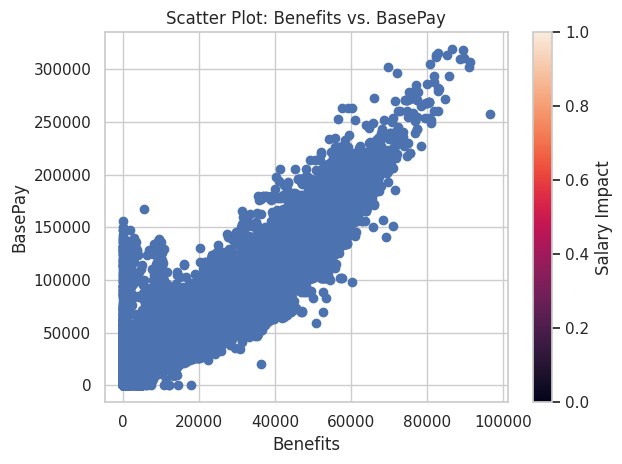

In [ ]:
plt.scatter(df['Benefits'], df['BasePay'], cmap='Greens')

cbar = plt.colorbar()
cbar.set_label('Salary Impact')

plt.xlabel('Benefits')
plt.ylabel('BasePay')
plt.title('Scatter Plot: Benefits vs. BasePay')

plt.tight_layout()
plt.show()

<ipython-input-77-ff26d8eefb9e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Benefits'],df.OtherPay ,cmap='summer', edgecolor='black' ,linewidth=1,alpha =0.75)


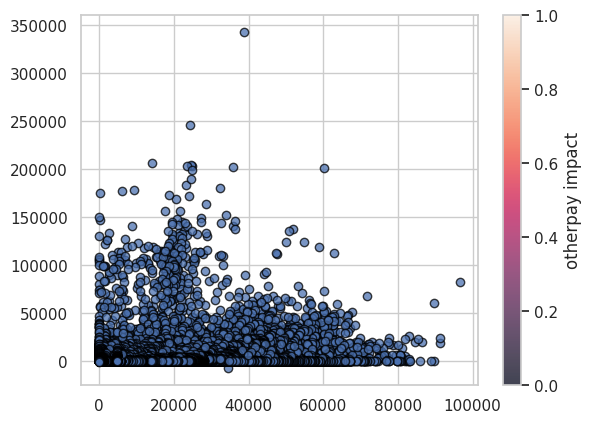

In [ ]:
plt.scatter(df['Benefits'],df['OtherPay'] ,cmap='summer', edgecolor='black' ,linewidth=1,alpha =0.75)
cbar=plt.colorbar()
cbar.set_label('otherpay impact')

<ipython-input-81-b44683ee1a4a>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Benefits'], df['TotalPay'], cmap='Purples', edgecolor='black', linewidth=1, alpha=0.75)


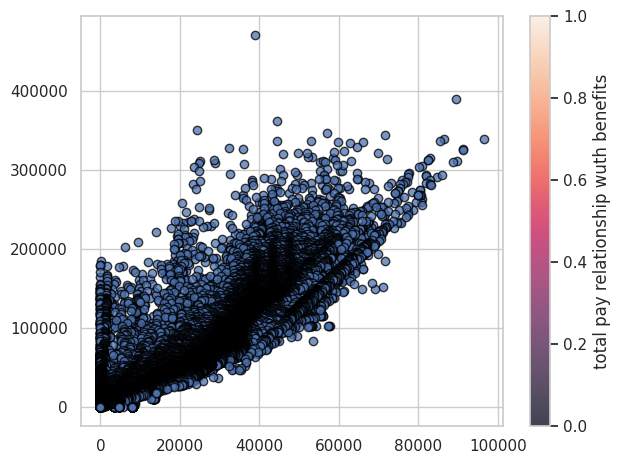

In [ ]:

plt.scatter(df['Benefits'], df['TotalPay'], cmap='Purples', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('total pay relationship wuth benefits')

plt.tight_layout()
plt.show()

In [ ]:
px.scatter_matrix(df , dimensions=["Benefits" , "BasePay" ,"TotalPay" ,"OtherPay"] , color="JobTitle")

In [ ]:
missing = df.loc[:, ["Benefits", "BasePay"]]

df_mice=df.copy()
mice=IterativeImputer(random_state=101 ,max_iter=20) #becouse there is a correlation between variables i used mice algorithm (iterative imputer) that is based on regresion model
df_imputed = mice.fit_transform(missing)
df.loc[:, ["Benefits", "BasePay"]] = df_imputed

df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [ ]:
filt2=df['BasePay'] < 0
df[filt2]

Id      EmployeeName                 JobTitle     BasePay  \
72832    72833    Irwin Sidharta             Junior Clerk -166.010000   
72865    72866      Robert Scott             Junior Clerk -121.630000   
72872    72873   Chung Huey Kung             Junior Clerk -109.220000   
72874    72875         Jordan Li             Junior Clerk -106.600000   
72878    72879   Richard Jackson             Junior Clerk -101.880000   
...        ...               ...                      ...         ...   
110526  110527    Arthur L Curry  PS Aide Health Services -341.283638   
110527  110528     Nereida  Vega             Senior Clerk -341.283638   
110528  110529  Timothy E Gibson         Police Officer 3 -348.615247   
110529  110530    Mark E Laherty         Police Officer 3 -363.305320   
110530  110531     David P Kucia         Police Officer 3 -432.297640   

        OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  Year  \
72832        249.02      0.00      6.56     83.01             89.57  2012   
72865        182.70      0.00      5.44     61.07             66.51  2012   
72872        163.83      0.00      4.32     54.61             58.93  2012   
72874        159.90      0.00      4.66     53.30             57.96  2012   
72878        153.08      0.00      4.55     51.20             55.75  2012   
...             ...       ...       ...       ...               ...   ...   
110526         0.00     10.67      0.00     10.67             10.67  2013   
110527         0.00      5.56      0.00      5.56              5.56  2013   
110528         0.00      0.00     -2.73      0.00             -2.73  2013   
110529         0.00      0.00     -8.20      0.00             -8.20  2013   
110530         0.00      0.00    -33.89      0.00            -33.89  2013   

               Agency  
72832   San Francisco  
72865   San Francisco  
72872   San Francisco  
72874   San Francisco  
72878   San Francisco  
...               ...  
110526  San Francisco  
110527  San Francisco  
110528  San Francisco  
110529  San Francisco  
110530  San Francisco  

[170 rows x 11 columns]

In [ ]:
df[filt2]['JobTitle'].value_counts().sort_values(ascending=False)


Transit Operator                 12
Junior Clerk                     10
Police Officer 3                  8
Registered Nurse                  6
Environmental Service Worker      5
                                 ..
Senior Management Assistant       1
Employment & Training Spec 3      1
Airport Operations Supervisor     1
Utility Plumber Supervisor 1      1
PS Aide Health Services           1
Name: JobTitle, Length: 100, dtype: int64

In [ ]:
df[filt2]['JobTitle'].value_counts().sort_values(ascending=False)
